In [2]:
## Napovedovanje vrednosti, pa neki grafu

In [9]:
import numpy as np
from numpy import *
import operator
import matplotlib.pyplot as plt
from csv import DictReader
from collections import defaultdict

In [1]:
import pandas as pd

ucna_mnozica = pd.read_csv('data/train.csv')
testna_mnozica = pd.read_csv('data/test.csv')

(array([ 22., 126., 380., 343., 229., 144.,  86.,  49.,  28.,  23.,  12.,
          7.,   3.,   1.,   2.,   1.,   2.,   0.,   0.,   2.]),
 array([ 34900.,  70905., 106910., 142915., 178920., 214925., 250930.,
        286935., 322940., 358945., 394950., 430955., 466960., 502965.,
        538970., 574975., 610980., 646985., 682990., 718995., 755000.]),
 <a list of 20 Patch objects>)

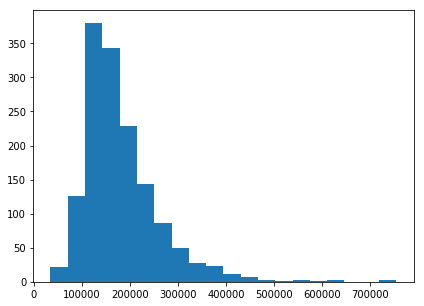

In [14]:
## Cene prodanih hiš v grafu

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.hist(ucna_mnozica['SalePrice'], density=False, bins=20)

In [24]:
ucna_mnozica.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

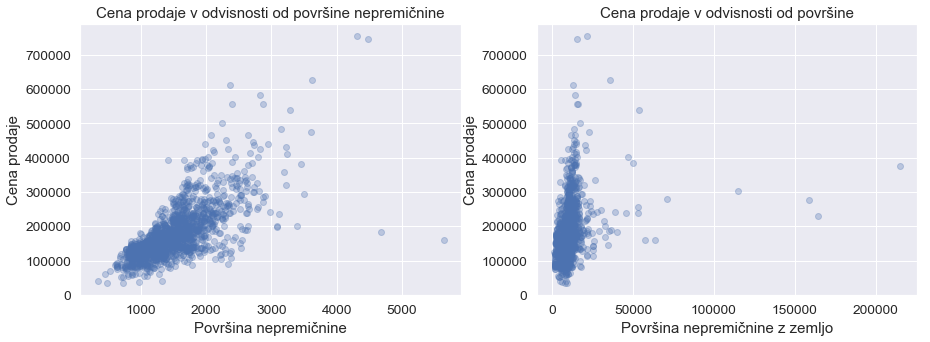

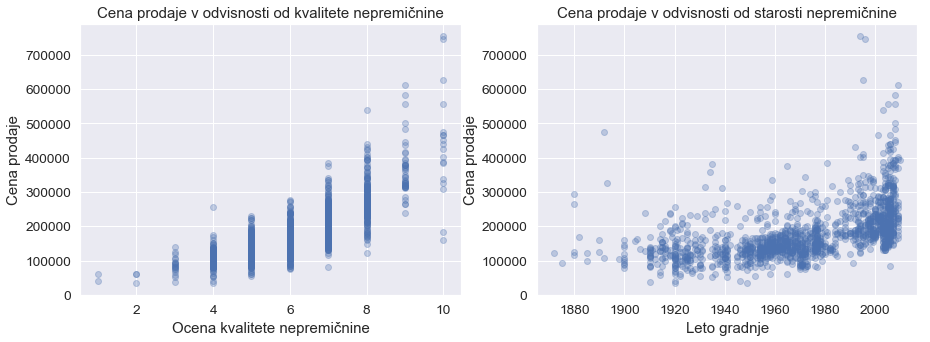

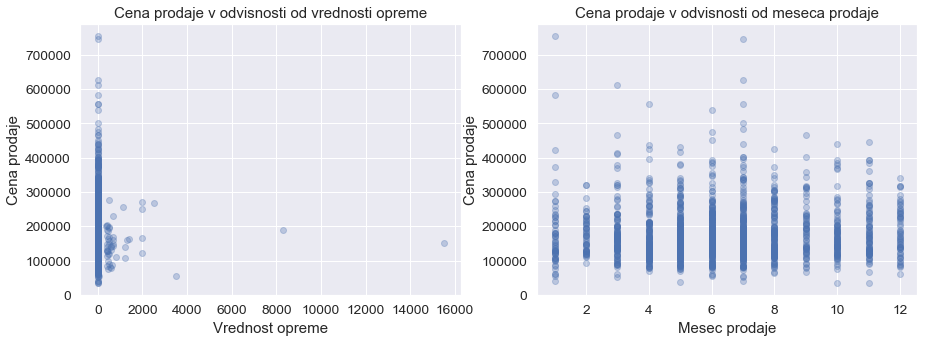

In [102]:
#Par grafov glede na to kaj najboljš pokaže vrednost hiše
#Najbolj koristno LotArea, GrLivArea pa YearBuilt
import matplotlib.pylab as pl

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.scatter(ucna_mnozica['GrLivArea'], ucna_mnozica['SalePrice'],alpha=0.3)
plt.xlabel("Površina nepremičnine")
plt.ylabel("Cena prodaje")
plt.title("Cena prodaje v odvisnosti od površine nepremičnine")


plt.subplot(1,2,2)
plt.scatter(ucna_mnozica['LotArea'], ucna_mnozica['SalePrice'],alpha=0.3)
plt.xlabel("Površina nepremičnine z zemljo")
plt.ylabel("Cena prodaje")
plt.title("Cena prodaje v odvisnosti od površine")
plt.show()


plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.scatter(ucna_mnozica['OverallQual'], ucna_mnozica['SalePrice'],alpha=0.3)
plt.xlabel("Ocena kvalitete nepremičnine")
plt.ylabel("Cena prodaje")
plt.title("Cena prodaje v odvisnosti od kvalitete nepremičnine")

plt.subplot(1,2,2)
plt.scatter(ucna_mnozica['YearBuilt'], ucna_mnozica['SalePrice'],alpha=0.3)
plt.xlabel("Leto gradnje")
plt.ylabel("Cena prodaje")
plt.title("Cena prodaje v odvisnosti od starosti nepremičnine")
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.scatter(ucna_mnozica['MiscVal'], ucna_mnozica['SalePrice'],alpha=0.3)
plt.xlabel("Vrednost opreme")
plt.ylabel("Cena prodaje")
plt.title("Cena prodaje v odvisnosti od vrednosti opreme")

plt.subplot(1,2,2)
plt.scatter(ucna_mnozica['MoSold'], ucna_mnozica['SalePrice'],alpha=0.3)
plt.xlabel("Mesec prodaje")
plt.ylabel("Cena prodaje")
plt.title("Cena prodaje v odvisnosti od meseca prodaje")
plt.show()

Text(0.5, 1.0, 'Cena prodaje v odvisnosti od soseske')

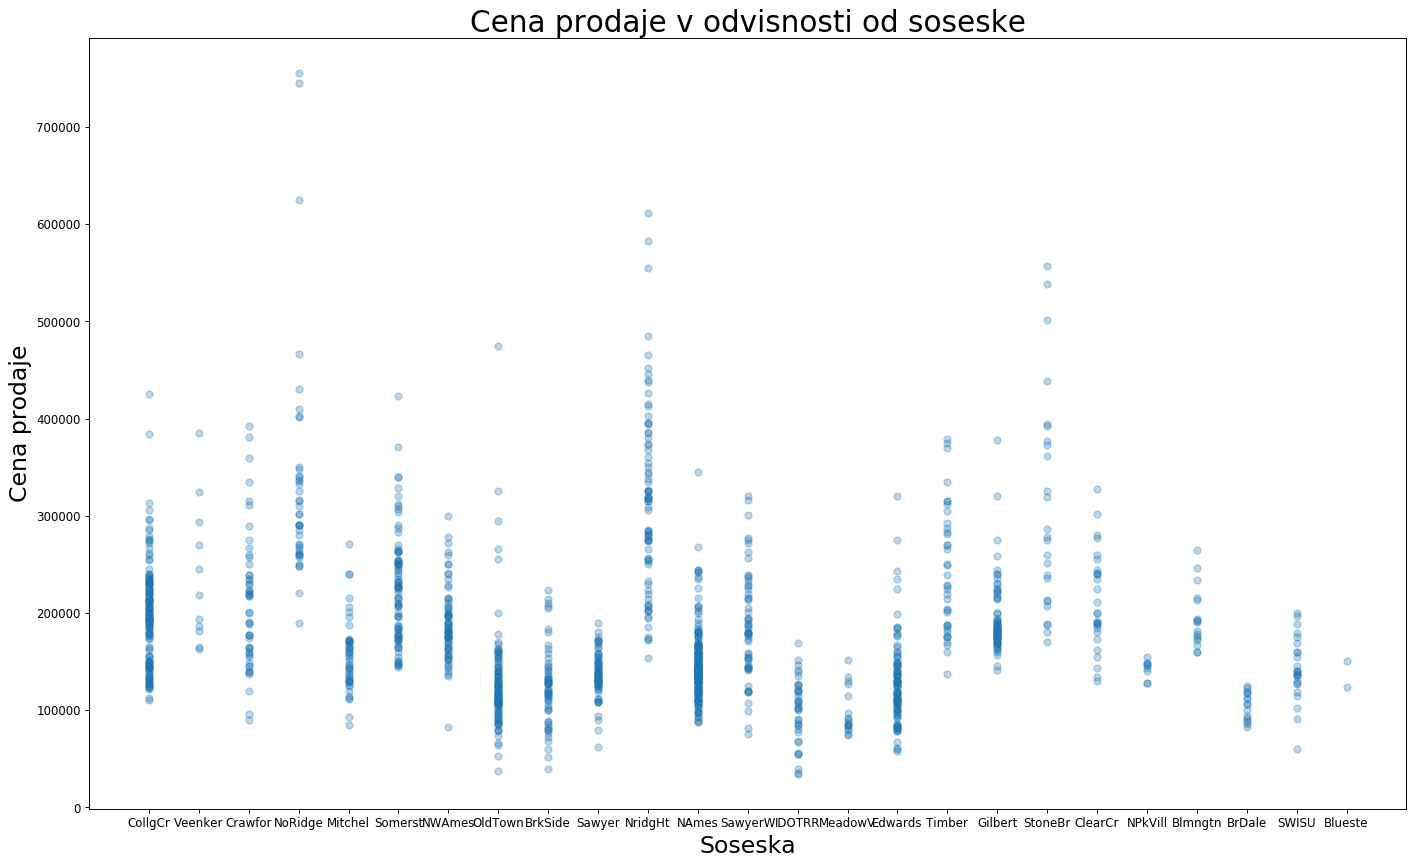

In [59]:

fig=plt.figure(figsize=(20, 12), dpi= 85, facecolor='W', edgecolor='k')
plt.scatter(ucna_mnozica['Neighborhood'], ucna_mnozica['SalePrice'],alpha=0.3)
plt.xlabel("Soseska", fontsize = 20)
plt.ylabel("Cena prodaje", fontsize = 20)
plt.title("Cena prodaje v odvisnosti od soseske", fontsize = 25)

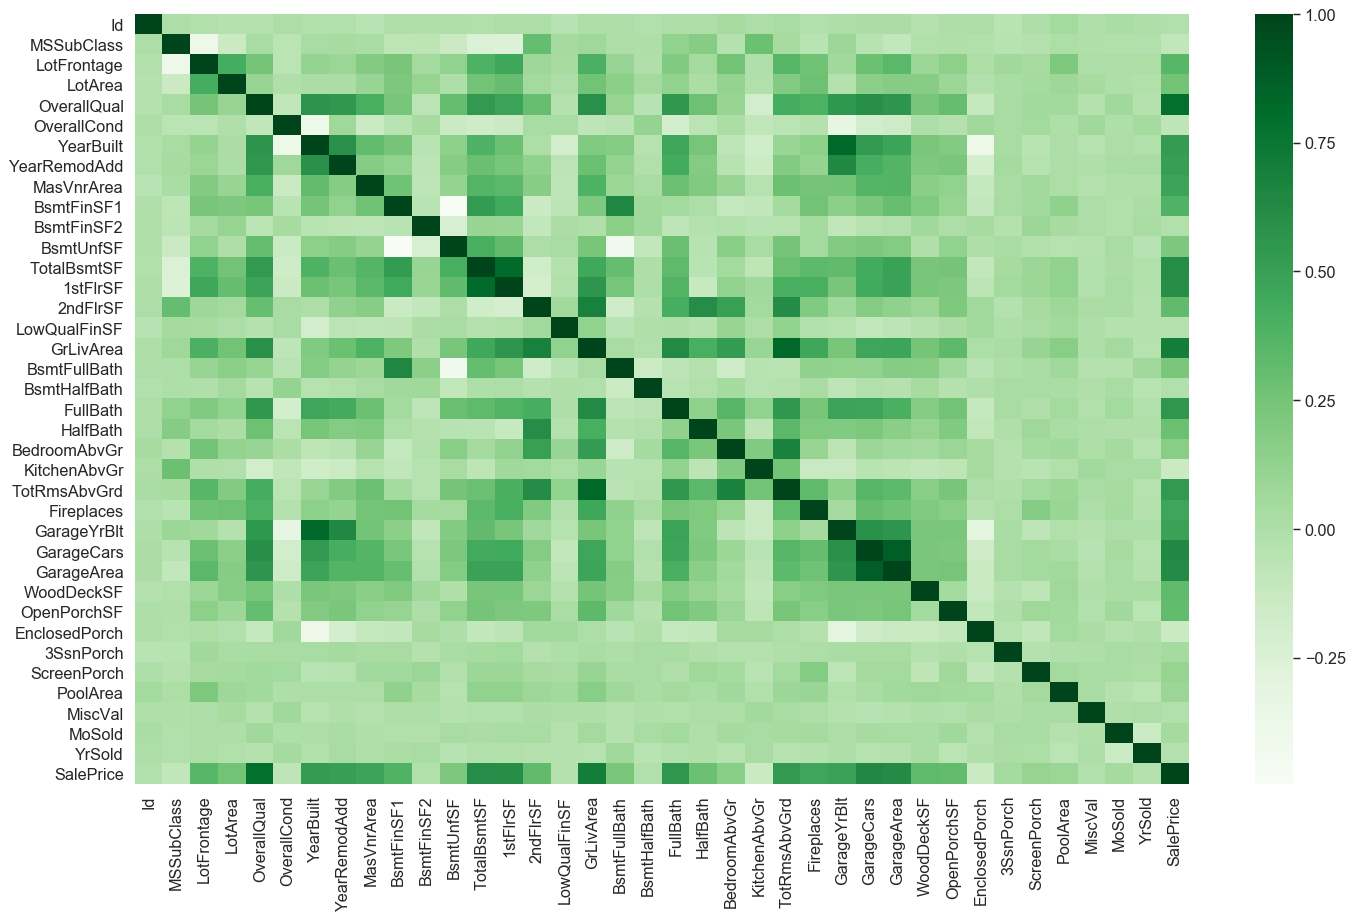

In [90]:
import seaborn as sns

##Korelacijska matrika pokaže podobno, da so stolpci ki najbolj vplicajo na končno ceno GrLivArea ter OverallQual

fig=plt.figure(figsize=(20, 12), dpi= 85, facecolor='W', edgecolor='k')
korelacija = ucna_mnozica.corr()
sns.heatmap(ucna_mnozica.corr(), xticklabels=korelacija.columns.values, yticklabels=korelacija.columns.values, cmap="Greens")


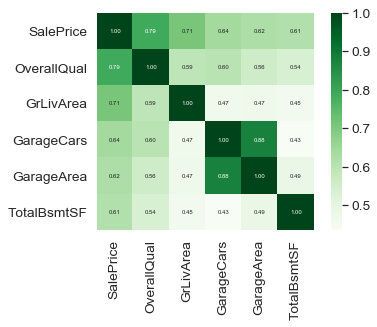

In [91]:

cols = korelacija.nlargest(6, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(ucna_mnozica[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True,cmap="Greens", square=True, fmt='.2f', annot_kws={'size': 6}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

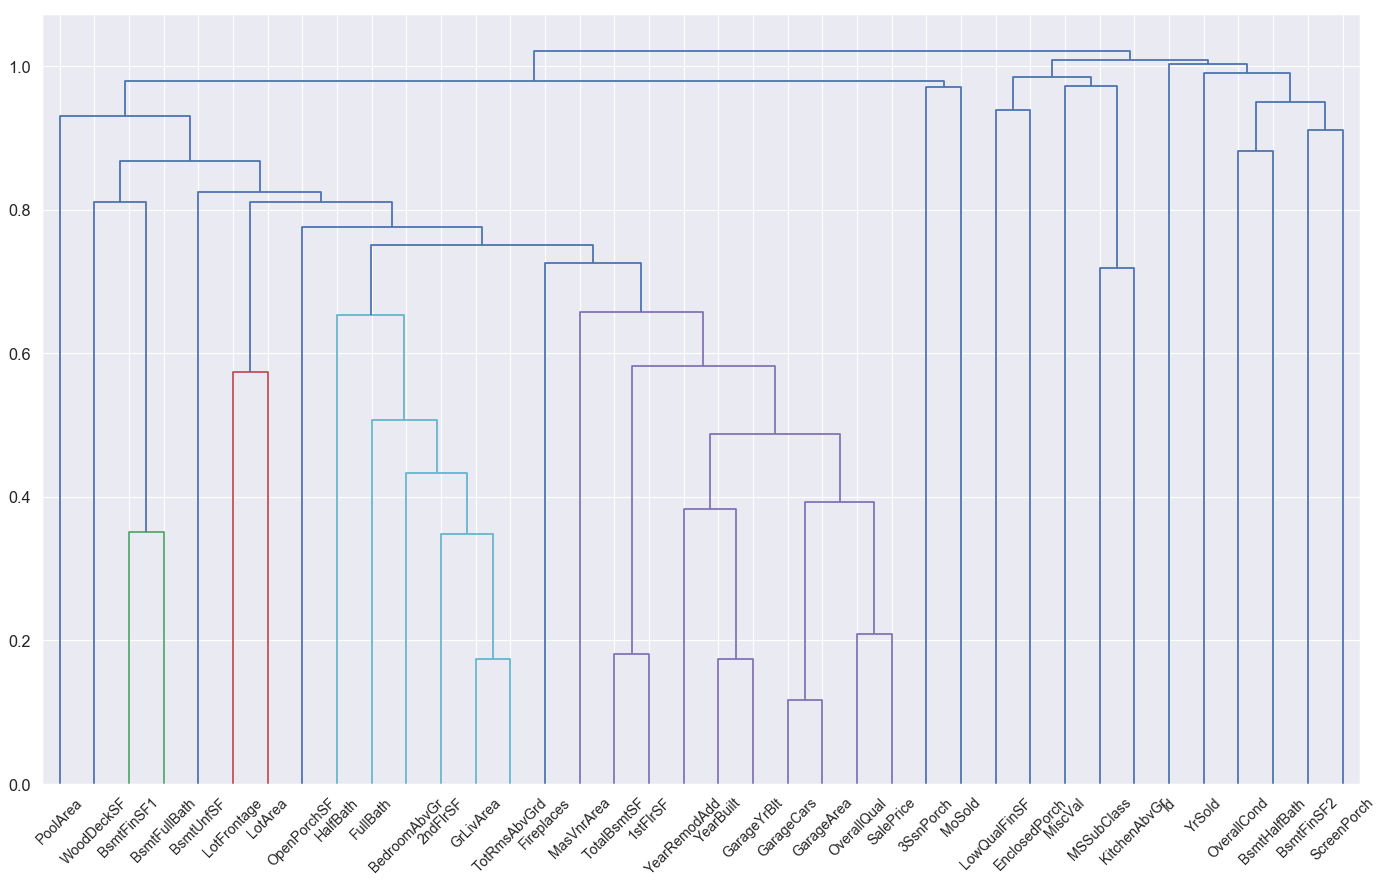

In [101]:
from scipy.cluster import hierarchy as hc
corr = ucna_mnozica.corr()
korelacija = 1- corr

##Ponovno pokaže, da sta kvaliteta in cena najbolj povezani

corr_condensed = hc.distance.squareform(korelacija) # convert to condensed
z = hc.linkage(corr_condensed, method='average')
fig=plt.figure(figsize=(20, 12), dpi= 85)
dendrogram = hc.dendrogram(z, labels=corr.columns,leaf_font_size=12)
plt.show()